<a href="https://colab.research.google.com/github/cesar1109/Fundamentos-de-Ciencia-de-Dados---2024/blob/main/Exercise1_Dados_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


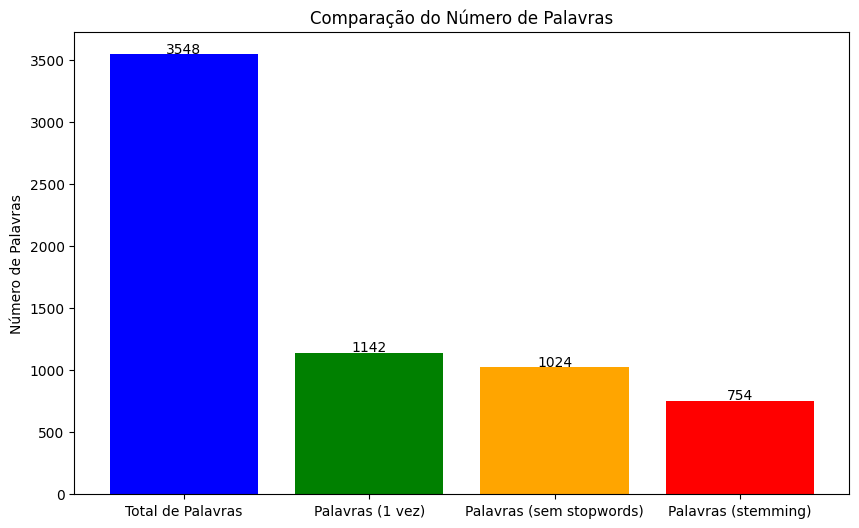

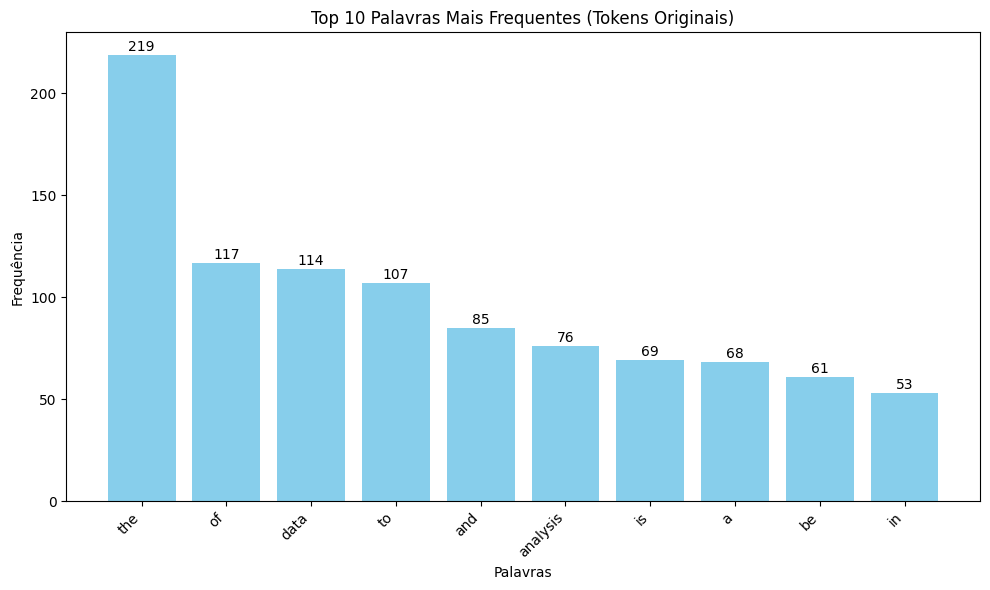

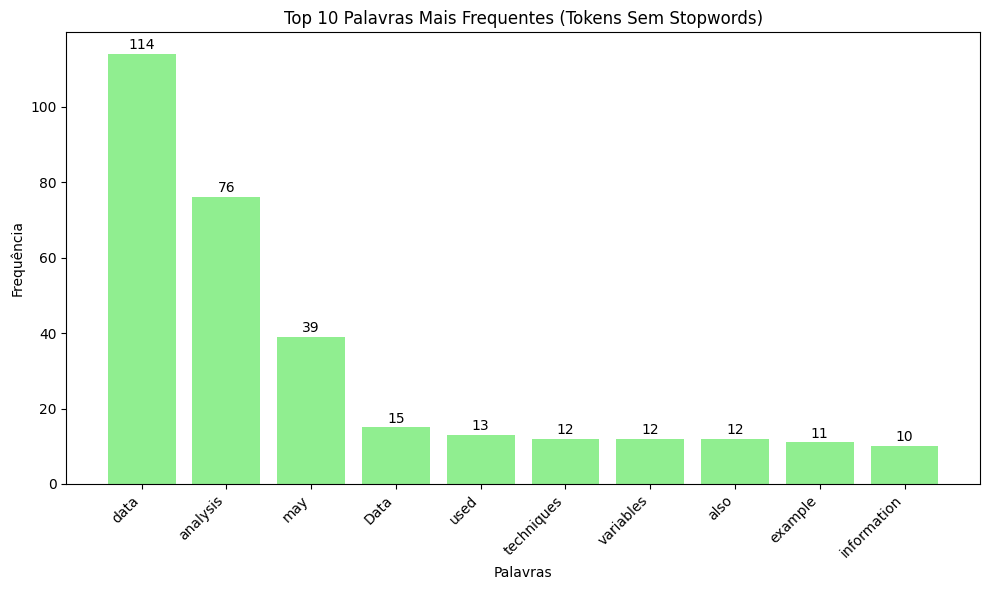

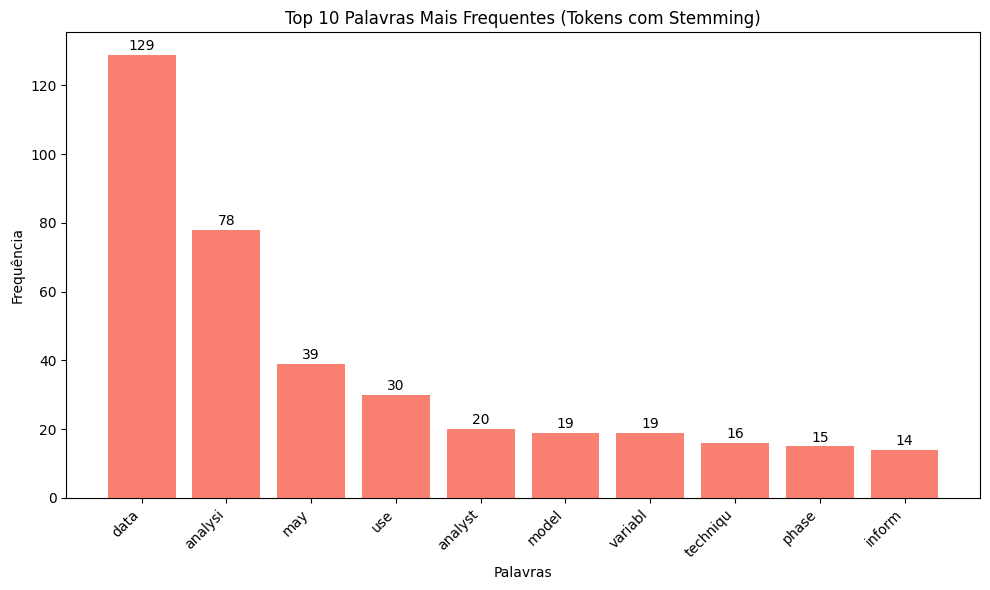

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')

# URL da página da Wikipedia
url = "https://en.wikipedia.org/wiki/Data_analysis"

# Fazendo uma solicitação GET para a URL
response = requests.get(url)

if response.status_code == 200:
    # Obtendo o conteúdo da página
    conteudo_pagina = response.text

    # Usando BeautifulSoup para analisar o conteúdo HTML
    soup = BeautifulSoup(conteudo_pagina, 'html.parser')

    # Encontrando o texto dentro das tags de parágrafo
    texto = ' '.join([p.text for p in soup.find_all('p')])

    # Removendo pontuações, números e siglas e tokenizando o texto filtrado
    texto_filtrado = re.sub(r'[^a-zA-Z\s]', '', texto)
    tokens = nltk.word_tokenize(texto_filtrado)

    # Removendo stopwords do conjunto de tokens
    stopwords_english = set(stopwords.words('english'))
    tokens_sem_stopwords = [token for token in tokens if token.lower() not in stopwords_english]

    # Aplicando a técnica de stemming aos tokens sem stopwords
    stemmer = PorterStemmer()
    tokens_stemmed = [stemmer.stem(token) for token in tokens_sem_stopwords]

    # Plotando um gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(["Total de Palavras", "Palavras (1 vez)", "Palavras (sem stopwords)", "Palavras (stemming)"],
            [len(tokens), len(set(tokens)), len(set(tokens_sem_stopwords)), len(set(tokens_stemmed))],
            color=['blue', 'green', 'orange', 'red'])
    plt.ylabel("Número de Palavras")
    plt.title("Comparação do Número de Palavras")

    # Adicionando os números acima de cada barra
    for i, valor in enumerate([len(tokens), len(set(tokens)), len(set(tokens_sem_stopwords)), len(set(tokens_stemmed))]):
        plt.text(i, valor + 10, str(valor), ha='center')

    plt.show()

    # Contando a frequência de cada palavra nos tokens originais
    contagem_tokens = Counter(tokens)

    # Obtendo as 10 palavras mais frequentes nos tokens originais
    palavras_mais_frequentes_tokens = contagem_tokens.most_common(10)

    # Contando a frequência de cada palavra nos tokens sem stopwords
    contagem_tokens_sem_stopwords = Counter(tokens_sem_stopwords)

    # Obtendo as 10 palavras mais frequentes nos tokens sem stopwords
    palavras_mais_frequentes_tokens_sem_stopwords = contagem_tokens_sem_stopwords.most_common(10)

    # Contando a frequência de cada palavra nos tokens com stemming
    contagem_tokens_stemmed = Counter(tokens_stemmed)

    # Obtendo as 10 palavras mais frequentes nos tokens com stemming
    palavras_mais_frequentes_tokens_stemmed = contagem_tokens_stemmed.most_common(10)


    # Plotando um gráfico de barras das 10 palavras mais frequentes nos tokens originais
    plt.figure(figsize=(10, 6))
    palavras_tokens, frequencias_tokens = zip(*palavras_mais_frequentes_tokens)
    plt.bar(palavras_tokens, frequencias_tokens, color='skyblue')
    plt.xlabel('Palavras')
    plt.ylabel('Frequência')
    plt.title('Top 10 Palavras Mais Frequentes (Tokens Originais)')
    plt.xticks(rotation=45, ha='right')

    # Adicionando os números acima de cada barra
    for i, valor in enumerate(frequencias_tokens):
        plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Plotando um gráfico de barras das 10 palavras mais frequentes nos tokens sem stopwords
    plt.figure(figsize=(10, 6))
    palavras_sem_stopwords, frequencias_sem_stopwords = zip(*palavras_mais_frequentes_tokens_sem_stopwords)
    plt.bar(palavras_sem_stopwords, frequencias_sem_stopwords, color='lightgreen')
    plt.xlabel('Palavras')
    plt.ylabel('Frequência')
    plt.title('Top 10 Palavras Mais Frequentes (Tokens Sem Stopwords)')
    plt.xticks(rotation=45, ha='right')

    # Adicionando os números acima de cada barra
    for i, valor in enumerate(frequencias_sem_stopwords):
        plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Plotando um gráfico de barras das 10 palavras mais frequentes nos tokens com stemming
    plt.figure(figsize=(10, 6))
    palavras_stemmed, frequencias_stemmed = zip(*palavras_mais_frequentes_tokens_stemmed)
    plt.bar(palavras_stemmed, frequencias_stemmed, color='salmon')
    plt.xlabel('Palavras')
    plt.ylabel('Frequência')
    plt.title('Top 10 Palavras Mais Frequentes (Tokens com Stemming)')
    plt.xticks(rotation=45, ha='right')

    # Adicionando os números acima de cada barra
    for i, valor in enumerate(frequencias_stemmed):
        plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

else:
    print("Não foi possível acessar a URL.")